# Interpretability Mini Project

In this mini project, I will build a black-box model using a Random Forest classifier and apply various interpretability tools and techniques to generate meaningful insights from the model.

**Import the required libraries and methods.**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lime.lime_tabular

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz, plot_tree
from sklearn.inspection import permutation_importance

# Instead of plot_partial_dependence(est, X, features)
from sklearn.inspection import PartialDependenceDisplay

**Load the Dataset.**

The dataset contains the following features (predictors):

city_ development index : Developement index of the city, ranged from 0 to 1
training_hours: Training hours completed, ranged from 0 to 336
company_size: Size of the current company, ranged from 0 to 7 where 0 means less than 10 employees and 7 means more than 10,000 employees
education_level: Education level of the candidate, ranged from 0 to 4 where 0 means Primary School and 4 means Phd
experience: Total experience in years, ranged from 0 to 21
company_type : Categorical column with one-hot encodings. Type of current company: 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other', 'Public Sector', 'NGO'
and the prediction outcome is:

target: 0 – Not looking for a job change, 1 – Looking for a job change.

In [7]:
job_df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML201EN-SkillsNetwork/labs/module_4/datasets/hr_new_job_processed.csv")

In [8]:
job_df.info()

job_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504 entries, 0 to 11503
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city_development_index            11504 non-null  float64
 1   training_hours                    11504 non-null  float64
 2   company_size                      11504 non-null  float64
 3   experience                        11504 non-null  float64
 4   education_level                   11504 non-null  float64
 5   company_type_Early Stage Startup  11504 non-null  float64
 6   company_type_Funded Startup       11504 non-null  float64
 7   company_type_NGO                  11504 non-null  float64
 8   company_type_Other                11504 non-null  float64
 9   company_type_Public Sector        11504 non-null  float64
 10  company_type_Pvt Ltd              11504 non-null  float64
 11  target                            11504 non-null  float64
dtypes: f

,count,mean,std,min,25%,50%,75%,max
city_development_index,11504.0,0.806056,0.128302,0.448,0.682,0.878,0.920000,0.949
training_hours,11504.0,64.380421,59.048600,1.000,23.000,46.000,88.000000,336.000
company_size,11504.0,2.748997,1.783676,0.000,2.000,2.000,3.000000,7.000
experience,11504.0,9.530985,6.733267,0.000,4.000,8.000,15.000000,21.000
education_level,11504.0,2.131568,0.627610,0.000,2.000,2.000,2.247823,4.000
company_type_Early Stage Startup,11504.0,0.029180,0.161802,0.000,0.000,0.000,0.000000,1.000
company_type_Funded Startup,11504.0,0.042537,0.197495,0.000,0.000,0.000,0.000000,1.000
company_type_NGO,11504.0,0.023619,0.147348,0.000,0.000,0.000,0.000000,1.000
company_type_Other,11504.0,0.005557,0.070875,0.000,0.000,0.000,0.000000,1.000
company_type_Public Sector,11504.0,0.045442,0.200717,0.000,0.000,0.000,0.000000,1.000


In [9]:
#Split the features and outcome variable
X = job_df.iloc[:, job_df.columns != 'target']
y = job_df[['target']]

**Now, let's create the black-box model.**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12)

In [11]:
black_box_model = RandomForestClassifier(n_estimators=100, max_depth=25, max_features=10, random_state=0, bootstrap=True)

black_box_model.fit(X_train, y_train)
y_black_box_pred = black_box_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [12]:
metrics.roc_auc_score(y_test, y_black_box_pred)

np.float64(0.8100834812828164)

Our black-box model achieved an accuracy of 81%, which indicates strong performance.

**With the model in place, we can now apply model-agnostic interpretability techniques to better understand its behavior.**

Now I'll use sklearn’s permutation_importance to evaluate feature importance and identify which features contribute the most to the model’s predictions.

In [13]:
features_importance = permutation_importance(black_box_model, X=X_train, y = y_train, n_repeats=5, random_state=123, n_jobs=2)

features_importance.importances.shape

(11, 5)

In [14]:
features_importance.importances

array([[0.30392263, 0.30251005, 0.30772574, 0.30044551, 0.3067478 ],
       [0.15820928, 0.15038574, 0.15168967, 0.15190699, 0.15657938],
       [0.1802673 , 0.18450505, 0.18678692, 0.18309247, 0.19156797],
       [0.15321091, 0.14821254, 0.15321091, 0.14875584, 0.15962186],
       [0.12343801, 0.12246007, 0.1201782 , 0.12093882, 0.11822232],
       [0.00086928, 0.00076062, 0.00076062, 0.00076062, 0.00065196],
       [0.00206454, 0.00195588, 0.00206454, 0.00195588, 0.00152124],
       [0.00141258, 0.00152124, 0.00173856, 0.00152124, 0.00130392],
       [0.00065196, 0.00065196, 0.00065196, 0.0005433 , 0.0005433 ],
       [0.00967076, 0.01043138, 0.0101054 , 0.01097468, 0.01086602],
       [0.04867978, 0.04965772, 0.04715854, 0.04737586, 0.04965772]])

Interpreting feature importance directly from the array can be difficult. To make this clearer, I'll visualize the feature importance scores using a box plot.

In [23]:
def visualize_feature_importance(importance_array):
  sorted_idx = importance_array.importances_mean.argsort()
  sorted_idx = importance_array.importances_mean.argsort()

  fig, ax = plt.subplots()
  fig.set_figwidth(16)
  fig.set_figheight(10)

  fig.tight_layout()

  ax.boxplot(importance_array.importances[sorted_idx].T,
             vert=False, labels=X_train.columns[sorted_idx])
  ax.set_title('Feature importance (train set)')
  fig.show()

/tmp/ipython-input-3233627166.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(importance_array.importances[sorted_idx].T,


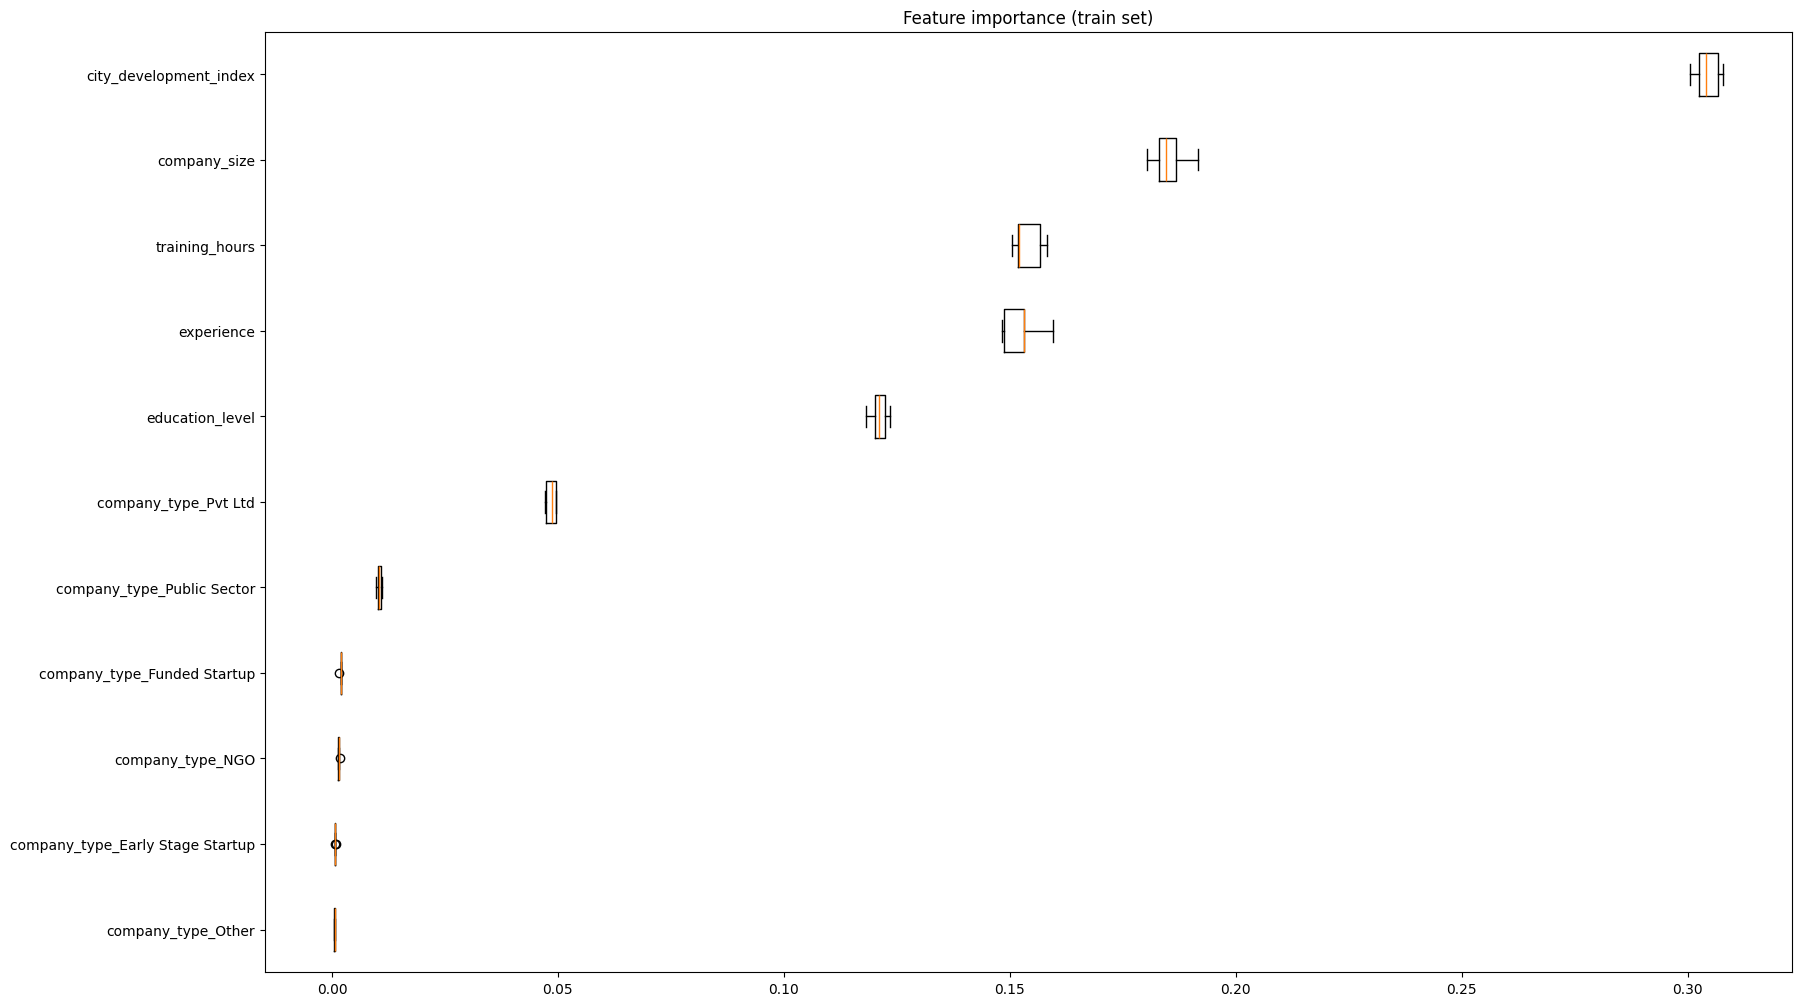

In [24]:
visualize_feature_importance(features_importance)

**The box plot highlights the ranked feature importances. The top contributing features include city_development_index, company_size, training_hours, experience, and education_level, among others.**

In [27]:
#n_repeats=10,
feature_importances = permutation_importance(estimator=black_box_model, X = X_train, y = y_train, n_repeats=10,
                                random_state=123, n_jobs=2)

feature_importances.importances.shape

(11, 10)

/tmp/ipython-input-3233627166.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(importance_array.importances[sorted_idx].T,


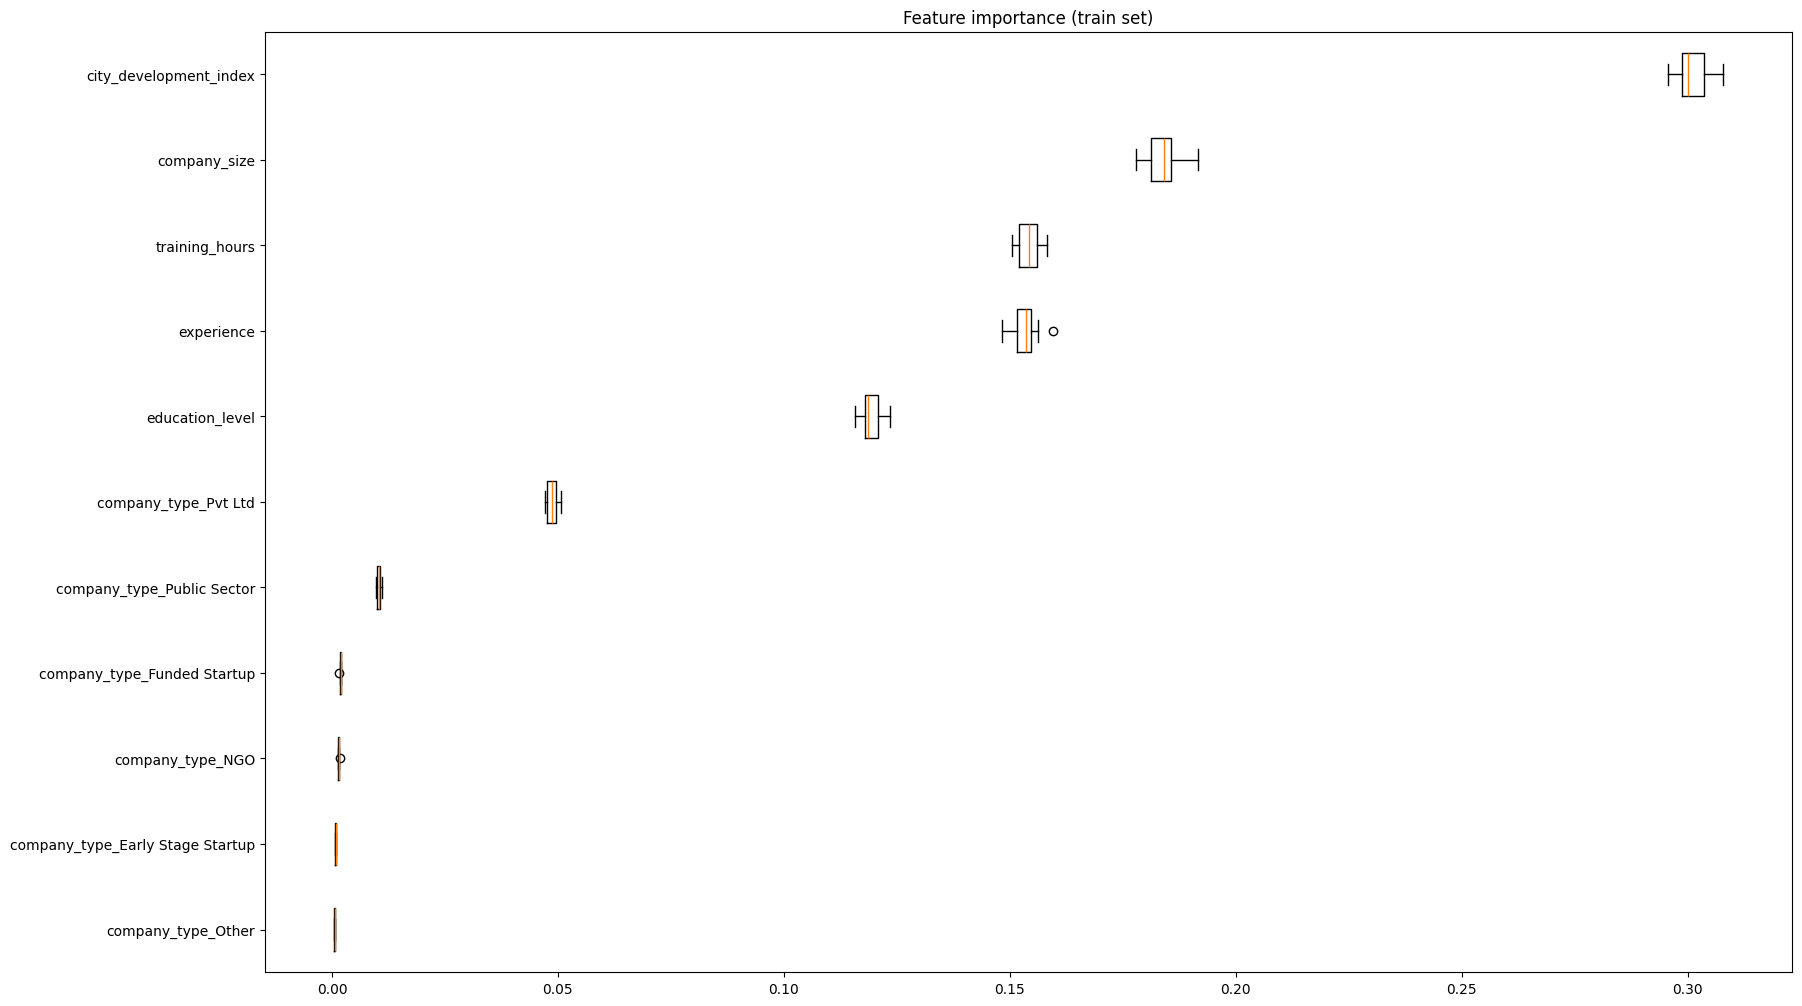

In [28]:
visualize_feature_importance(feature_importances)

**Next, I'll apply Partial Dependence Plots (PDPs) to explore how selected important features influence the outcome variable and to better understand their relationships.**

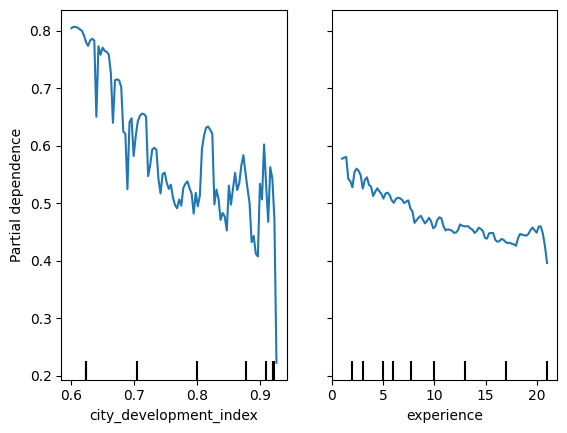

In [31]:
from functools import partialmethod
important_features = ['city_development_index', 'experience']

PartialDependenceDisplay.from_estimator(black_box_model, X_train, important_features)

The graph indicates that city_development_index and experience exhibit a negative relationship with the outcome variable, meaning that as these features increase, the predicted outcome tends to decrease.

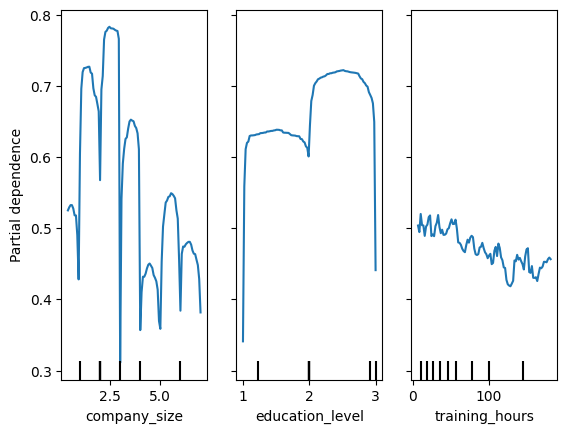

In [32]:
imf = ['company_size', 'education_level', 'training_hours']

PartialDependenceDisplay.from_estimator(black_box_model, X_train, imf)

**Next, I'll build a global surrogate model to provide an approximate interpretation of the black-box model. Logistic Regression will be used as the surrogate for this purpose.**

In [35]:
min_max_scaller = MinMaxScaler()
X_test_minmax = min_max_scaller.fit_transform(X_test)

In [37]:
lr_surrogate = LogisticRegression(max_iter=1000, random_state=123, penalty='l1', solver='liblinear')
lr_surrogate.fit(X_test_minmax, y_black_box_pred)
y_surrogate_pred = lr_surrogate.predict(X_test_minmax)

In [38]:
metrics.accuracy_score(y_black_box_pred, y_surrogate_pred)

0.7392438070404173

The Logistic Regression surrogate achieved 74% accuracy, indicating that it can explain approximately 74% of the black-box model's behavior.

Next, I'll implement a method to extract and examine the coefficients from the surrogate model to understand feature contributions.

In [39]:
def get_feature_coefs(regression_model):
  coef_dict={}

  for coef,feat in zip(regression_model.coef_[0, :], X_test.columns):
    if abs(coef) >= 0.01:
      coef_dict[feat] = coef

  coef_dict = {k: v for k, v in sorted(coef_dict.items(), key = lambda item: item[1])}
  return coef_dict

In [40]:
coef_dict = get_feature_coefs(lr_surrogate)
coef_dict

{'city_development_index': np.float64(-4.149056882358008),
 'company_size': np.float64(-1.082500440266407),
 'experience': np.float64(-0.9609138256470435),
 'training_hours': np.float64(-0.9037405762965436),
 'company_type_Funded Startup': np.float64(-0.42848946210043004),
 'company_type_Early Stage Startup': np.float64(-0.16900213180033646),
 'company_type_Public Sector': np.float64(0.3063819950368439),
 'education_level': np.float64(0.783505295947167),
 'company_type_Other': np.float64(0.8801916374583518),
 'company_type_Pvt Ltd': np.float64(1.6186743457235413)}

Next, I'll implement a method to visualize the surrogate model's coefficients, with negative contributions shown in red and positive contributions in green, to clearly illustrate each feature's impact.

In [41]:
def get_bar_color(values):
  color_vals = []
  for val in values:
    if val <= 0:
      color_vals.append('red')
    else:
      color_vals.append('green')
  return color_vals


def visualize_coefs(coef_dict):
  features = list(coef_dict.keys())
  coefs    = list(coef_dict.values())
  colors   = get_bar_color(coefs)
  y_pos    = np.arange(len(features))

  plt.rcdefaults()
  fig, ax = plt.subplots()

  ax.barh(y_pos, coefs, align='center', color=colors)
  ax.set_yticks(y_pos)
  ax.set_yticklabels(features)

  ax.invert_yaxis()
  ax.set_xlabel('Importance')
  ax.set_title('Feature importance')
  plt.show()

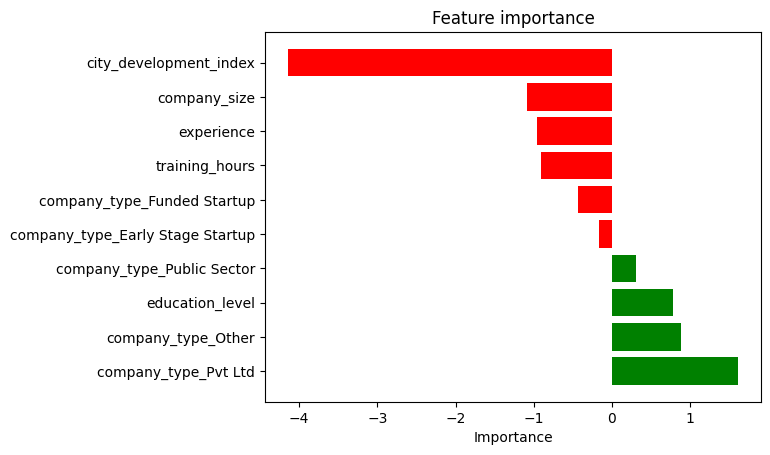

In [42]:
visualize_coefs(coef_dict)

The bar chart shows that features such as city_development_index and experience have negative contributions, whereas education_level and working at a Pvt Ltd company contribute positively to the model's predictions.

**Next, I’ll use a Decision Tree as the surrogate model to evaluate how well it can approximate the black-box model.**

In [44]:
ds_surrogate = DecisionTreeClassifier(max_depth=5,max_features=10, random_state=123)
ds_surrogate.fit(X_test, y_black_box_pred)
yds_surrogate_pred = ds_surrogate.predict(X_test)

In [45]:
metrics.accuracy_score(y_black_box_pred, yds_surrogate_pred)

0.8205128205128205

The Decision Tree surrogate achieved 82% accuracy, indicating it can explain 82% of the black-box model's behavior—an improvement over the Logistic Regression surrogate.

Next, I’ll interpret the Decision Tree surrogate by using sklearn’s export_text function to examine its structure and decision rules.

In [46]:
tree_exp = export_text(ds_surrogate, feature_names=list(X_test.columns))
print(tree_exp)

|--- city_development_index <= 0.70
|   |--- experience <= 17.50
|   |   |--- training_hours <= 304.03
|   |   |   |--- training_hours <= 99.94
|   |   |   |   |--- city_development_index <= 0.69
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- city_development_index >  0.69
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- training_hours >  99.94
|   |   |   |   |--- company_type_Funded Startup <= 0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- company_type_Funded Startup >  0.50
|   |   |   |   |   |--- class: 0.0
|   |   |--- training_hours >  304.03
|   |   |   |--- class: 0.0
|   |--- experience >  17.50
|   |   |--- city_development_index <= 0.66
|   |   |   |--- training_hours <= 51.00
|   |   |   |   |--- class: 1.0
|   |   |   |--- training_hours >  51.00
|   |   |   |   |--- training_hours <= 57.91
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- training_hours >  57.91
|   |   |   |   |   |--- class: 1.0
|   |   |--- city_development_index > 

The Decision Tree surrogate provides a clear set of decision rules approximating the black-box model. Important insights include: higher city_development_index and experience often lead to different outcomes than lower values, while training_hours, education_level, and company type also play significant roles in the model’s predictions. This tree gives an interpretable approximation of the black-box model’s behavior.

**Next, I’ll apply LIME (Local Interpretable Model-Agnostic Explanations) to analyze individual predictions and understand how features contribute locally to the model’s output.**

In [49]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_test.values,
    mode = 'classification',
    class_names=['Not Changing', 'Changing'],
    feature_names=list(X_test.columns),
    verbose=True,
    random_state=123
)

In [50]:
instance_idx = 22
selected_instance = X_test.iloc[[instance_idx]]

lime_test_instance = selected_instance.values.reshape(-1)
selected_instance

,city_development_index,training_hours,company_size,experience,education_level,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
6619,0.624,46.004193,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.7314563131273157
Prediction_local [0.99630576]
Right: 0.8354527591971297


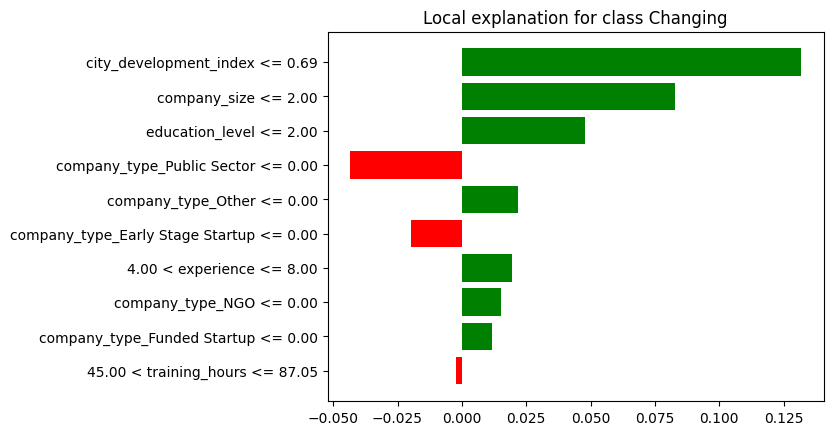

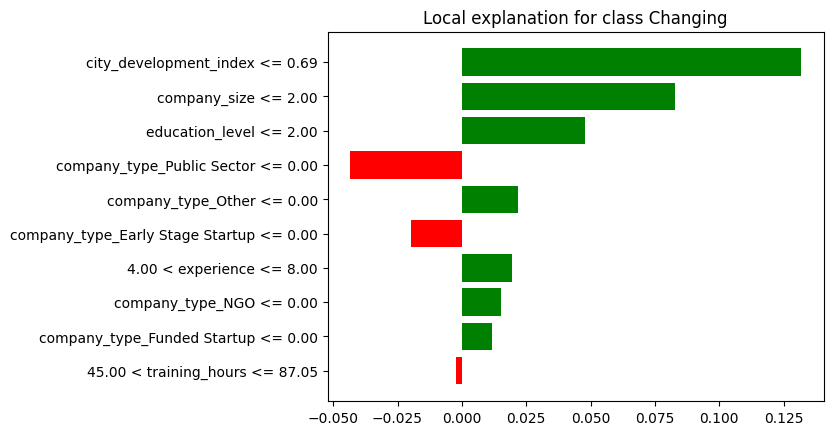

In [51]:
exp = explainer.explain_instance(
    lime_test_instance,
    black_box_model.predict_proba,
    num_features=10
)

exp.as_pyplot_figure()

This LIME plot illustrates the local contributions of features for a specific prediction. Features such as city_development_index, company_size, and education_level strongly increase the likelihood of the “Changing” class, while company_type_Public Sector and company_type_Early Stage Startup decrease it. This provides an interpretable, instance-level view of how the black-box model makes decisions.